## 2 신경망의 수학적 구성요소

2.1 신경망과의 첫만남 <br>
2.2 신경망을 위한 데이터 표현 <br>
2.3 신경망의 톱니바퀴: 텐서연산 <br>
2.4 신경망의 엔진: 그레이디언트 기반 최적화 <br>
2.5 첫번째 예제 다시 살펴보기 <br>
2.6 요약 <br>

### 2.1 신경망과의 첫 만남
#### 코드2-1 케라스에서 MNIST데이터셋 적재하기

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
# train데이터
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]


In [3]:
# test데이터
print(test_images.shape)
print(len(test_labels))
print(test_labels)

(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


#### 코드2-2 신경망 구조

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(52, activation='relu'), # 층, layer
    layers.Dense(10, activation='softmax') # softmax층
])

# 완전 연결(fully-connected)된 신경망층인 Dense층이 2개가 연속되어 있음

#### 코드 2-3 컴파일단계

In [5]:
model.compile(optimizer='rmsprop', # 성능향상, 모델을 업데이트 하는 메커니즘
             loss='sparse_categorical_crossentropy', # 모델의 성능을 측정하는 방법으로 모델이 옳음 방향으로 학습될 수 있도록 도와줌
              metrics=["accuracy"]) # 여기서는 정확도(정확히 분류된 이미지의 비율)만 보겠음

#### 코드 2-4 이미지 데이터 준비하기
데이터를 모델에 맞는 크기로 바꾸고 모든 값을 0과 1사이로 스케일을 조정

In [6]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32")/255

#### 코드 2-5 모델 훈련하기

In [7]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4025 - accuracy: 0.8911
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2115 - accuracy: 0.9398
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1641 - accuracy: 0.9537
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1361 - accuracy: 0.9619
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1169 - accuracy: 0.9670


#### 코드 2-6 모델을 사용하여 예측만들기

데스트 세트처럼 훈련 데이터가 아닌 이미지를 지칭함

In [8]:
test_digits = test_images[0:10] 
predictions = model.predict(test_digits)
predictions[0]

array([1.0764012e-05, 8.7391907e-09, 5.0407900e-05, 4.0145321e-03,
       9.6506243e-09, 3.5486621e-05, 1.7453468e-12, 9.9565518e-01,
       1.7059710e-05, 2.1663107e-04], dtype=float32)

In [9]:
print(predictions[0].argmax())
print(predictions[0][7])
print(test_labels[0])

7
0.9956552
7


#### 코드 2-7 새로운 데이터에서 모델 평가하기

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc}")

# 모델 훈련했을때 나는 정확도 84%가 나왔는데, 그것보단 지금 평가가 낮으니 내꺼는 훈련이 잘됐음
# 교재에선 overfitting 됐음

313/313 [==============================] - 0s 1ms/step - loss: 0.1203 - accuracy: 0.9657
테스트 정확도: 0.9656999707221985


### 2.2 신경망을 위한 데이터 표현

Tensor는 다차원 넘파이 배열에 데이터를 저장하는 것부터 시작 <br>
텐서는 데이터를 위한 container <br>
텐서는 임의의 차원 개수를 자기는 행렬의 일반화된 모습, 텐서에서는 차원(dimension)을 종종 축(axis) <br>

#### 2.2.1 스칼라(랭크-0 텐서)

- 스칼라(scalar) = Scalar Tensor, Rank-0 Tensor, 0D Tensor <br>
- 텐서의 축 개수를 랭크(rank) <br>

In [11]:
# ex)
import numpy as np
x = np.array(12)
print(x)
print(x.ndim)

12
0


#### 2.2.2 벡터(랭크-1 텐서)

- 벡터(vector) = Rank-1 Tensor, 1D Tensor <br>

In [12]:
# ex)
x = np.array([12, 3, 6, 14, 7])
print(x)
print(x.ndim)

[12  3  6 14  7]
1


#### 2.2.3 행렬(랭크-2 텐서)

- 행렬(matrix) = Rank-2 Tensor, 2D Tensor <br>
- has 2 axes: row & column 

In [13]:
# ex)
x = np.array([[5, 78, 2, 34, 0], # 행 -> , 첫번째 행 [5, 78, 2, 34, 0]
             [6, 79, 3, 35, 1],  # 열↓, 첫번째 열[5,6,7]
             [7, 80, 4, 36, 2]])
print(x.ndim)

2


#### 2.2.4 랭크-3 텐서와 더 높은 랭크의 텐서

- 이런 행렬들을 하나의 새로운 배열로 합치면 숫자가 채워진 직육면체 형태로 해석할 수 있는 랭크-3 텐서 (또는 3D텐서)가 만들어진다. <br>

In [5]:
(25, 3, 6, 5)
train[batchsize*(n-1):batch_size*n
(10,).shape

SyntaxError: unexpected EOF while parsing (1715295208.py, line 3)

In [9]:
import numpy as np

X = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])
Y = np.array([[1., 2., 3.]])
print(X.shape)
print(Y.shape)
print(X+Y)

(3, 3)
(1, 3)
[[ 2.  4.  6.]
 [ 5.  7.  9.]
 [ 8. 10. 12.]]


In [10]:
import numpy as np
X = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])
y = np.array([1., 2.])

print(X.shape)
print(y.shape)
print((X+y))

# 애러확인!

(3, 3)
(2,)


ValueError: operands could not be broadcast together with shapes (3,3) (2,) 

In [13]:
import tensorflow as tf 

x = tf.constant([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])
# y = tf.constant([1., 1.])
y = tf.constant([1., 1., 2.])

print(x.get_shape())
print(y.get_shape())
print(x+y)

(3, 3)
(3,)
tf.Tensor(
[[ 2.  3.  5.]
 [ 5.  6.  8.]
 [ 8.  9. 11.]], shape=(3, 3), dtype=float32)


#### 2.2.5 핵심 속성

- 축의 개수(랭크): 랭크-3 텐서에서는 3개의 축이 있고, 행렬에는 2개의 축이 있다. <br>
- 크기shape: 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타낸 파이썬의 튜플(tuple) <br>
    - ex) 2.2.3의 예시는 (3,5), rank3Tensor: (3,3,5) <br>
- 데이터 타입(dtype): 텐서의 각 요소의 데이터 타입 <br>
    - ex) float16, float32, float64, unit8, 가끔 string

In [14]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

# 8비트 정수형 rank-3 tensor, 
# 28*28 크기의 정수 행렬 6만개, 
# 각 행렬은 하나의 흑백 이미지, 행렬의 각 원소는 0과 255사이의 값을 가진다.

3
(60000, 28, 28)
uint8


#### 코드 2-8 다섯번쨰 이미지 출력하기

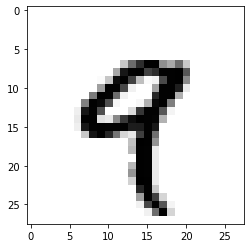

9
uint8


In [15]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print(train_labels[4]) # 정수 9!
print(train_labels[4].dtype) # dtype은 unit8

#### 2.2.6 넘파이로 텐서 조작하기

슬라이싱(slicing)

In [16]:
# ex) 
my_slice = train_images[10:100]
print(my_slice.shape)

my_slice2 = train_images[10:100, : : ] # 위에꺼랑 동일함
print(my_slice2.shape)

my_slice3 = train_images[10:100, 0:28, 0:28 ] # 이전과 동일
print(my_slice3.shape)

my_slice4 = train_images[:, 14:, 14:] 
print(my_slice4.shape)

my_slice5 = train_images[:, 7:-7, 7:-7] 
print(my_slice5.shape)

(90, 28, 28)
(90, 28, 28)
(90, 28, 28)
(60000, 14, 14)
(60000, 14, 14)


#### 2.2.7 배치 데이터

- 첫번째 축(인덱스가 0부터 시작)은 샘플 축(sample axis) = sample dimension <br>

In [17]:
# ex)
batch1 = train_images[:128]
batch2 = train_images[128:256]
# print(batch1)
# print(batch2)

n=3
batch3 = train_images[128*n:128*(n+1)]
print(batch3)

# 첫번쨰 축을 batch axis or batch dimension

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


#### 2.2.8 텐서의 실제 사례

- 벡터 데이터: (samples, features) 크기의 랭크-2 텐서, 각 샘플은 수치 속성(특성, feature)로 구성된 벡터 <br>
- 시계열 데이터 또는 시퀀스 (sequence) 데이터: (samples, timesteps,features) 크기의 랭크-3 텐서, 각 샘플은 특성 벡터의 길이가 timesteps인 sequence<br>
- 이미지: (samples, height, width, channels) or (samples, channels, height, width) 크기의 랭크-4 텐서, 각 샘플은 픽셀의 2d 격자고 각 픽셀은 수치 값(채널(channel)의 벡터 <br>
- 동영상: (samples, frames, height, width, channles) 또는 (samples, frames, channels, height, width) 크기의 랭크-5 텐서, 각 샘플은 이미지의 길이가 frames인 sequence <br>

#### 2.2.9 벡터 데이터

- 1번째 축: 샘플 축
- 2번째 축: 특성 축feature axis

#### 2.2.10 시계열 데이터 또는 시퀀스 데이터

2 examples) <br>
- 주식 가격 데이터셋
- twitter dataset: 100만개의 트윗은 (1000000, 280, 128)

#### 2.2.11 이미지 데이터

- 흑백: Rank2 Tensor, since only 1 channel => (128, 256, 256, 1) <br>
- 컬러 이미지: Rank2 Tensor, 3 channels => (128, 256, 256, 3) <br><br>

이미지 텐서의 크기를 지정하는 방식 2가지:
- 채널-마지막(channel last): (samples, height, width, color_depth) <br> 
- 채널-우선(channel first): (samples, color_depth, height, width), ex: (128, 1, 256, 256), (128, 3, 256, 256) <br>

#### 2.2.12 비디오 데이터

Rank-5 Tensor <br>
- 1Frame: (height, width, color_depth)의 Rank3 Tensor <br>
- Sequences of Frames: (frames, height, width, color_depth)의 Rank4 Tensor <br>
- video batch: (samples, frames, height, width, color_depth)의 Rank5 Tensor <br>
ex) 60초짜리 144*256 유튜브 클립 = 240 프레임 <br>
(4, 240, 144, 256, 3) => total 106168320

### 2.3 신경망의 톱니바퀴: 텐서연산

Tensor operation = Tensor Function

In [ ]:
# 케라스 층 생성 방식
keras.layers.Dense(512, activation='relu')

In [ ]:
# W는 행렬, b는 벡터
output = relu(dot(W, input)+b)

# 입력 텐서와 텐서 W사이의 점곱(dot)
# 점곱으로 만들어진 행렬과 벡터 b사이의 덧셈(+)
# relu 연산. relu(x)는 max(x, 0)

#### 2.3.1 원소별 연산

relu함수와 덧셈은 원소별 연산(element-wise operation), 각 원소에 독립적으로 적용

In [ ]:
# ex) relu연산 구현
def naive_relu(x):
    assert len(x.shape) ==2  # x는 rank-2 numpy array
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
# ex) 덧셈도 같음
def naive_add(x, y):
    assert len(x.shape) ==2  # x와 y는 rank-2 numpy array
    assert x.shape == y.shape
    x = x.copy()  # 입력 텐서 자체를 바꾸지 않도록 복사
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

# 곱셈, 뺄셈등도 가능

In [ ]:
import numpy as np

z = x+y   # 원소별 덧셈
z = np.maximu(z, 0.) # 원소별 렐루 함수

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x+y
    z = np.maximum(z, 0.)
print("걸린시간: {0:.2f} s".format(time.time()- t0))  # 0.02초가 걸림

In [ ]:
t1 = time.time()
for _ in range(1000):
    z = naive_add(x,y)
    z = naive_relu(z)
print("걸린시간: {0:.2f} s".format(time.time()- t0)) 

# CUDA 구현을 통해 원소별 연산이 실행됨

#### 2.3.2 Broadcasting

has 2 steps:
1. 큰 텐서의 ndim에 맞도록 작은 텐서에 (broadcasting 축이라고 부르는) 축이 추가. <br>
2. 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복. <br>

In [ ]:
# ex)
import numpy as np

X = np.random.random((32,10)) # X는 크기가(32,10)인 랜덤한 행렬
y = np.random.random((10, )) # y는 크키가 (10,)인 랜덤한 행렬
y = np.expand_dims(y, axis=0) # 이제 y의 크기는 (1, 10)
Y = np.concatenate([y]*32, axis=0)  # 축 0을 따라 y를 32번 반혹하여 크기가 (32,10)인 Y를 얻는다.

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) ==2  # x는 Rank-2 Numpy Array
    assert len(y.shape) ==1  # y는 Numpy Vector
    assert x.shape[1] == y.shape[0] #
    x = x.copy() # 입력 텐서 자체를 바꾸지 않도록 복사
    for i in range(x.shape[0])
        for j in range(x.shape[1])
            x[i, j] += y[j]
    return x

# (a, b, ..., n, n+1, ...m) 크기의 텐서와 (n, n+1, ...m) 크기의 텐서 사이에 브로드캐스팅으로 원소별 연산을 적용가능
# 이때 broadcasting은 a부터 n-1까지의 축에 자동으로 일어난다

In [ ]:
# 원소별 maximum연산을 적용하는 예
import numpy as np

x = np.random.random((64, 3, 32, 10)) # x는 (64, 3, 32,10) 크기의 랜덤 텐서
y = np.random.random((32, 10)) # y는 (32,10) 크기의 랜덤 텐서
z = np.maximum(x,y) # 출력 z크기는 x와 동일하게 (64, 3, 32,10)이다

#### 2.3.3 텐서 곱셈

- 텐서 곱셈(tensor product) 또는 점곱(dot product) (* 연산자를 사용하는 원소별 곱셈과 혼동ㄴㄴ) <br>
- 넘파이에서 텐서 곰셉은 np.dot 함수를 수행하여 수행함

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

z = x•y

In [ ]:
def naive_vector_dot(x, y): 
    assert len(x.shape) == 1  
    assert len(y.shape) == 1 # x와 y는 Numpy Vector
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in ragne(x.shape[0]):
        z += x[i]*y[i]
    return z

In [18]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2  # x는 Numpy Matrix
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]  # x의 두번째 차원이 y의 첫번째 차원과 같아야 한다
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
# 행렬=벡터 점곱과 벡터-벡터 점곱 사으이 관계를 부각하기 위해 앞에서 만든 함수 재사용
def native_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

# 두 텐서 중 하나라도 ndim이 1보다 크면 dot 연산에 교환 법칙이 성립되지 않는다. dot(x,y)는 dot(y,x) 같지 않다. 

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2  
    assert len(y.shape) == 2 # x와 y는 Numpy Matrix
    assert x.shape[1] == y.shape[0]  # x의 두번째 차원이 y의 첫번째 차원과 같아야 한다
    z = np.zeros((x.shape[0]), y.shape[1])  # 이 연산은 0이 채워진 특정 크기의 벡터를 만든다.
    for i in range(x.shape[0]): # x의 행을 반복한다
        for j in range(x.shape[1]): # y의 열을 반복한다
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y) 
    return z

In [ ]:
(a, b, c, d) • (d,) => (a,b,c)
(a, b, c, d) • (d,e) => (a,b,c,e)

#### 2.3.3 텐서 크기 변환

- 첫번째 신경망 예제의 Dense측에서는 사용되지 않지만 모델에 주입할 숫자 데이터를 전처리할 때 사용 <br>

In [19]:
train_images = train_images.reshape((60000, 28*28)) 
# 텐서의 크기를 변환한다는 것은 특정 크기에 맞게 열과 행을 재배열
# 원래 텐서와 원소 개수가 동일

x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
print(x.shape)

x1 = x.reshape((6,1))
print(x1)

x2 = x.reshape((2,3))
print(x2)

(3, 2)
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]
[[0. 1. 2.]
 [3. 4. 5.]]


In [20]:
# 자주 사용하는 건 전치행렬
x3 = np.zeros((300, 20))
x4 = np.transpose(x3)
print(x4.shape)

(20, 300)


#### 2.3.5 텐서 여산의 기하학적 해석

In [ ]:
A = [0.5, 1]

# 이동
A + [1,1]

# 회전
R = [[cos(theta), -sin(theta)],
     [sin(theta), cos(theta)]

# 크기변경(scaling)
S = [[horizontl_factor, 0], 
     [0, vertical_factor]]
# 선형변환 (linear transform): 임의의 행렬과 점곱
# 아핀변환 (affine transform) : 선형변환과 이동의 조합, y= W*x+b
# relu 활성화 함수를 사용하는 Dense층: 
affine2(affine1(x)) = W2•(W1•x+b1) + b2 = (W2•W1)•x + (W2•b1+b2) 
# 선형변환 부분이 W2•W1, 이동부분이 W2•b1+b2
     
# 기울이기 (skewing)

#### 2.3.6 딥러닝의 기하학적 해석

- 종이공을 펼치는 일 <br>
- 기초적인 연산을 길게 연결하여 복잡한 기하학적 변환을 조금씩 분해하는 방식이 마치 사람이 종이 공을 펼치기 위한 전략과 비슷 <br>

### 2.4 신경망으 엔진:gradient 기반 최적화

In [ ]:
output= relu(dot(W, input) + b) 
#  W and b = Weight(가중치) trainable parameter(훈련되는 파라미터)
# W = Kernel 
# b = bias 

훈련(train)은 훈련반복루프(training loop) 안에서 일어남
1. 훈련 샘플 x와 이에 상응하는 타깃 y_true의 배치를 추출 <br>
2. x를 사용하여 모델을 실행하고(정방향 패스(forward pass) 단계), 예측 y_pred를 구한다. <br>
3. y_pred와 y_true의 차이를 측정하여 이 배치에 대한 모데르이 손실을 계산 <br>
4. 배치에 대한 손실이 조금 감소되도록 모델의 모든 가중치를 업데이트 <br><br> 

경사하강법(gradient descent)
- 신겸앙을 가능하게 만든 최적화
ex) z = x+y에서 y를 조금 변경하면 z가 조금 변경, y의 변경 방향을 알고있다면 z도 예측 가능

미분가능(Differentiable)
=> 모델의 가중치를 조금 변경하면 소실값이 예측 가능한 방향으로 조금 바뀜

Gradient라는 수학 연산ㅇ르 사용하여 모델 가중치를 여러 방향으로 이동했을 때 손실이 얼마나 변하는지 설명 가능

#### 2.4.1 도함수란?

In [ ]:
# ex)
f(x) = y
f(x+epsilon_x) = y + a*epsilon_x
# 이 선형적인 근사는 x가 p에 충분히 가까울 떄 유효
# 기울기 p에서 f의 도함수(derivative)라고 함

# 왼쪽의 도함수는 오른쪽
cos(x) = -sin(x) 

f(x) = a*x = f'(x)=a

#### 2.4.2 텐서 연산의 도함수: Gradient

- 텐서연산(or 텐서함수)의 도함수를 Gradient라고 부름, 이를 곡률(curve)로 나타냄 <br>
- 머신러닝의 예 <br>
    - 입력 벡터, x (데이터셋에 있는 샘플) <br>
    - 행렬, W (모델의 가중치) <br>
    - 타깃, y_true(모델이 x에 연관시키기 위해 학습해ㅑ할 값) <br> 
    - 손실 함수, loss(현재의 예측과 y_true간의 차이를 측정하기 위해 사용) <br>

In [ ]:
# W를 사용하여 y_pred를 계싼하고 그다으 예측 y_pred와 타깃 y_true사이의 손실 또는 차이를 계산
y_pred = dot(W, x) # 모델 가중치 W를 사용하여 x에 대한 예측을 만든다
loss_value = loss(y_pred, y_true) # 예측이 얼마나 벗어났는지 추정

loss_value = f(W) # f는 W가 변화할 때 손실 값이 형성하는 곡선(또는 다차원 표면)을 설명

# 현재의 W값을 W0이라고 할때, 점 W0에서 f의 도함수는 W와 크기가 같은 텐서 grad(loss_value, W0)
# 이 텐서의 각 원소 grad(loss_value, W0[)i,j]는 W0[i,j]를 수정했을 떄 loss_value가 바뀌는 방향과 크기를 나타낸다.
# 텐서 grad(loss_value, W0)가 W0에서 함수 f(W) = loss_value의 gradient
# W0근처에서 W에 대한 loss_value의 gradient'라고 말한다. 

편도 함수 <br>
(입력으로 행렬W를 받는) 텐서 연산 grad(f(W), W)는 스칼라 함수 grad_ij(f(W), w_ij)의 조합으로 표현할 수 있다. 이 스칼라 함수는 W의 다른 모든 가중치가 일정하다고 가정할 떄 가중치 W[i,j]에 대한 loss_value = f(W)의 도함수를 반환하다. 이떄 grad_ij를 W[i, j]에 대한 f의 편도함수(partial derivative)라고 부른다.

#### 2.4.3 확률적 경사하강법 (SGD, StochasticGradientDescent)

함수의 최솟값은 도함수가 0인 지점, 따라서 이 지점을 모두 찾고 이 중에서 어떤 포인트의 함수 값이 가장 작은지 확인하는 것 <br>

1. 훈련 샘플 배치 x와 이에 상응하는 타깃 y_true를 추출 <br>
2. x로 모델을 실행하고 예측 y_pred를 구함(이를 정방향 패스라고 한다) <br>
3. 이 배치에서 y_pred와 y_true 사이의 오차를 측정하여 모델의 손실을 계산 <br>
4. 모델의 파라미터에 대한 손실 함수의 gradient를 계산 (이를 역방향패스(backward pass)라고 한다 <br>
5. gradient의 반대 방향으올 파라미터를 조금 이동시킨다. 예를 들어 W-= learning_rate * gradient처럼 하면 배치에 대한 손실이 조금 감소함. learning_rate은 경사 하강법 과정의 속도를 조절하는 스칼라 값 <br>

위에 5번이 mini-batch stochastic gradient descent (SGD), 확률적(stochastic)이란 단어는 각 배치 데이터가 무작위로 선택된다는 의미(확률적이란 것은 무작위(random)하다는 것의 과학적 표현). <br>
하지만 경사하강법을 2차원에 표현하는 것이 쉽지않음 => 시렞론 1000000이상 차원의 공간을 2d 저차원으로 표현하는게 실전과 항상 맞지는 않는다! <br>

최적화(=optimization or optimizer)의 변종<br>
- SGD
- Adagrad
- RMSProp 

비교점<br>
- 확률적경사하강법(StochasticGradientDescent): 하나의 샘플과 하나의 타깃을 뽑는것
- mini-batch SGD: 둘의 절충안 
- 배치경사하강법(Gradient Descent): 모든 데이터를 사용하여 반복을 실행

In [ ]:
past_velocity = 0
momentum = 0.1  # 모멘텀 상수
while loss>0.01:  # 최적화 반복 루프
    w, loss, gradient = get_current_parameters()
    velocity = momentum*past_velocity - learning_rate*gradient
    x = w+momentum*velocity - learning_rate*gradient 
    past_velocity = velocity
    update_paremeter(w)

#### 2.4.4 도함수 연결: 역전파 알고리즘

함수가 미분 가능하기 때문에 gradient를 쉽게 계산할 수 있다고 가정했음 과연 really? <br>
2개 이상의 층을 가진 모델의 경우 가중치에 대한 손실의 gradient를 어떻게 구함? 이게 역전파 알고리즘(Backpropagation Algorithm)이 필요한 이유<br>

In [ ]:
# 연쇄법칙
loss_value = loss(y_true, softmax(dot(relu(dot(inputs, W1) +b1), W2) + b2))

# 미적분의 연쇄법칙(chain rule)을 사용하면 이렇게 연결된 함수의 도함수르 ㄹ구할 수 있따. 

In [ ]:
def fg(x):
    x1 = g(x)
    y = f(x1)
    return y

In [ ]:
grad(y, x) == grad(y, x1) * grad(x1, x)

In [ ]:
def fghj(x):
    x1 = j(x)
    x2 = h(x1)
    x3 = g(x2)
    y = f(x3)
    return y

In [ ]:
grad(y, x) == (grad(y, x3) * grad(x3, x2) * grad(x2, x1) * grad(x1, x)) 
# 이 연쇄법칙을 적용하는 것이 역전파 알고리즘

<b> 계산 그래프를 활용한 자동 미분 (전부 다 그림이라 이 부분은 간단하게 summary하겠음) </b> <br><br>

- 정방향패스: 위에어 아래로 그래프의 모든 노드에 전파 <-> 역방향패스: 그 반대 <br>
- 나올수 있는 결과: <br>
    - grad(loss_val, x2) = 1, x2가 epsilon만큼 변할때 loss_val = abs(4-x2) <br>
    - grad(x2, x1) = 1, x1가 epsilon만큼 변할때 x2 = x1+b = 6+b <br>
    - grad(x1, w) = 2, w가 epsilon만큼 변할때 x1 = x * w = 2 * w는 2 * epsilon만큼 변하기 때문 <br><br>
    
- 연쇄법칙이 역방향 그래프에 대해 알려주는 것: 노드가 연겨된 경로를 따라 각 에지의 도함수를 곱하면 어떤 노드에 대한 다른 노드이 도함수를 얻을 수 있음 <br>
    - grad(loss_val, w) = grad(loss_val, x2) * grad(x2, x1) * grad(x1, w) <br>
    - grad(loss_val, w) = 1*1*2 = 2 <br>
    - grad(loss_val, b) = 1*1 = 1 <br>
- 텐서플로우는 자동미분이 가능 <br>

In [ ]:
# 텐서플로의 gradientTape
import tensorflow as tf

x = tf.Variable(0.)  # 초깃값 0으로 스칼라 변수를 생성
with tf.GradientTape() as tape: # GradientTape블록을 시작
    y = 2*x +3  # 이 블록안에엇 변수에 텐서 연산을 적용
grad_of_y_wrt_x = tape.gradient(y, w) # tape를 사용해서 변수 x에 대한 출력 y의 gradient를 계산

# GradientTape을 다차원 텐서와 함꼐 사용할 수 있음
x = tf.Variable(tf.zeros(2,2))
with tf.GradientTape() as tape:
    y = 2*x +3 
grad_of_y_wrt_x = tape.gradient(y, x) # grad_of_y_wrt_x는 (x와 크기가 같은) (2,2) 크기의 텐서로 x=[[0,0], [0,0]]일때 y=2*x+3의 곡률을 나타냄

W = tf.Variable(tf.random.uniform((2,2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.unifor((2,2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b]) # grad_of_y_wrt_W_and_b는 2개의 텐서를 담은 리스트

### 2.5 첫번째 예시 다시 살펴보기

1. 층이 서로 연결되어 모델을 구성, 모델은 입력 데이터를 예측으로 매핑 <br>
2. 손실 함수가 이 예측과 타깃을 비교하여 손실 값을 만든다 <br>
3. 모델의 예측이 기대한 것에 얼만나 잘 맞는지 측정한다 <br>

In [23]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28*28)) 
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000, 28*28)) 
test_images = test_images.astype("float32")/255

In [24]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

In [25]:
model.compile(optimizer="rmsprop",
             loss ="sparse_categorical_crossentropy",
             metrics =["accuracy"])

In [27]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

# 미적분의 연쇄 법칙에서 파생된 역전파 알고리즘을 사용하여 각 배치에서 모델이 ㄱ자ㅜㅇ치에 대한 손실의 gradient를 계산
# 이 배치에서 손실 값을 감소시키는 방향으로 가중치를 이동

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0279 - accuracy: 0.9919
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0213 - accuracy: 0.9939
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0164 - accuracy: 0.9952
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0124 - accuracy: 0.9965
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0097 - accuracy: 0.9972


#### 2.5.1 텐서플로를 사용하여 첫번째 예제를 밑바닥부터 다시 구현하기

#### 단순한 Dense 클래스

In [ ]:
output = activation(dot(W, input)+b)


import tensorflow as tf

# 2개의 tensorflow 변수 W와 b를 만듦
class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation
        w_shape = (input_size, output_size)  # 랜덤한 값으로 초기화된 (input_size, output_size) 크기의 행렬 W를 만든다.
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)
        
        b_shape = (output_size,) # 0으로 초기화된 (output_size,)크기의 벡터 b를 만든다.
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)
    
    def __call__(self, inputs): # 정방향 패스를 수행한다
        return self.activation(tf.matmul(inputs, self.W)+ self.b)
    
    @property
    def weights(self): # 층의 가중치를 추출하기 위한 메서드
        return [self.W, self.b]

#### 단순한 Sequential 클래스

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers
    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x
    
    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights
    
    model = NaiveSequential([
        NaiveDense(input_size=28*28, output_size=512, activation=tf.nn.relu),
        NaiveDense(input_size=28*28, output_size=10, activation=tf.nn.softmax),
    ])
    
    assert len(model.weights) == 4

#### 배치 제너레이터

In [36]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images)/batch_size)
    def next(self):
        images = self.images[self.index:self.index+self.batch_size]
        labels = self.labels[self.index:self.index+self.batch_size]
        self.index += self.batch_size
        return images, labels

#### 2.5.2 훈련 스텍 실행하기

1. 배치에 있는 이미지에 대해 모델의 예츠을 계산 <br>
2. 실제 레이블을 사용하여 이 예측의 손실 값을 계산 <br>
3. 모델 가중치에 대한 손실의 gradient를 계산 <br>
4. 이 gradient의 반대 방향으로 가중치를 조금 이동 <br>

In [40]:
# 2.4.4절에서 사용한 GradientTape객체를 사용

def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch) # 정방향 패스를 실행한다(GradientTape)블록안에서 모델의 예측을 계산
        per_sample_losses = tf.keras.losses.sparse_categorical(
            labels_batch, predictions
        )
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)  # 가중치에 대한 손실의 gradient를 계산한다, gradients 리스트의 각 항목은 model.weights리스트에 있는 가중치에 매칭됨
    update_weights(gradients, model.weights) # 이 gradient를 사용하여 가중치를 업데이트 함, 
    return average_loss

In [41]:
# update_weights함수를 구현하는 가장 간단한 방법은 각 가중치에서 gradient*learning_rate을 빼는 것
learning_rate = 1e-3
def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g*learning_rate)  # 텐서플로 변수의 assign_su 메서드는 -=와 동일

In [42]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

#### 2.5.3 전체 훈련 루프

훈련 epoch 하나는 단순히 훈련 데이터의 각 배치에 대한 훈련 스텝을 반복하는 것, 전체 훈련 루프(loop)는 단순히 에포크의 반복

In [43]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"에포크 {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"{batch_counter}번째 배치 손실: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32")/255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

#### 2.5.4 모델 평가하기

테스트 이미지에 대한 예측에 argmax함수를 적용하고, 예상 레이블과 비교하여 모델을 평가할 수 있음

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()   # 텐서플로 텐서의 .numpy() 메서드를 호출하여 넘파이 배열로 바꿈
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"정확도: {matches.mean(): .2f}")

#### 2.6 요약

- 텐서는 현대 머신러닝 시스템으의 기초, 텐서는 dtype, ndim, shape의 속성을 제공 <br>
- 텐서 연산(덧셈, 텐서 곱셈, 원소별 곱셈등)을 통해 수치 텐서를 조작가능 <br>
- 딥러닝 모델은 가중치 텐서를 매개변수로 받느 간단한 텐서 연산을 연결하여 구성 <br>
- 학습(learnin)은 훈련 데이터 샘플과 그에 상응하는 타깃이 주어졌을 때 손실 함수를 최소화 하는 모델의 가중치 값을 찾는 것을 의미 <br>
- 데이터 샘플과 타깃의 배치를 랜덤하게 뽑고 이 배치에서 모델 파라미터에 대한 손실의 gradient를 계산함으로써 학습이 진행, 모델의 파라미터는 gradient의 반대 방향으로 조금씩(학습률에 의해 정의된 크기만큼) 움직임, 이를 mini-batch gradient descent이라고 부름 <br>
- 전체 학습 과정은 신경망에 있는 모든 텐서 연산이 미분 가능하기 때문에 가능. 따라서현재 파라미터와 배치 데이터를 gradient값에 매핑해 주는 gradient함수를 구성하기 위해 미분의 연쇄법칙을 사용할 수 있다. We call this backpropagation
- 뒤에선 손실과 옵티마이저에 대햐여..

#### 예상문제
1. (128, 256, 256, 3) shape과 (3, 50)의 점곱(dot) = (128, 256, 256, 50) <br>

2. (32, 10)shape의 텐서와 (10,)shape의 텐서가 덧셈연산가능? 뭐때문에 가능? 최종 shape? <br>
가능, (32,10)으로 나옴, 브로드캐스팅연산때문에 가능 <br>


3. SGD는 데이터 하나로 학습하고 역전파 진행, 이렇게 되면 수렴하는데 불안정 <br>
배치경사는 데이터 전체를 넣고 학습, 속도가 느려짐 <br>
절충안: 미니배치 SGD, 배치를 작은 단위로 쪼개서 학습 <br>